In [1]:
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
import shapely

gdf = gpd.read_file("../00_source_data/reservations")
gdf = (
    gdf[gdf["NAME"].str.contains("Eastern Cherokee")]
    .explode(index_parts=True)
    .to_crs(epsg=3857)
)


In [2]:
tracts = gpd.read_file(
    "../00_source_data/tract_polygons"
)
tracts = tracts[tracts["COUNTYFP"] == "075"].to_crs(epsg=3857)
tracts["Labels"] = [1,2,3]
gdf = gdf.sjoin(tracts, predicate="within", how="inner").reset_index(drop=True)


In [3]:
for cols in gdf.columns:
    print(gdf[cols].nunique)

<bound method IndexOpsMixin.nunique of 0     0990
1     0990
2     0990
3     0990
4     0990
5     0990
6     0990
7     0990
8     0990
9     0990
10    0990
11    0990
12    0990
13    0990
14    0990
15    0990
16    0990
17    0990
Name: AIANNHCE, dtype: object>
<bound method IndexOpsMixin.nunique of 0     01018039
1     01018039
2     01018039
3     01018039
4     01018039
5     01018039
6     01018039
7     01018039
8     01018039
9     01018039
10    01018039
11    01018039
12    01018039
13    01018039
14    01018039
15    01018039
16    01018039
17    01018039
Name: AIANNHNS, dtype: object>
<bound method IndexOpsMixin.nunique of 0     0990R
1     0990R
2     0990R
3     0990R
4     0990R
5     0990R
6     0990R
7     0990R
8     0990R
9     0990R
10    0990R
11    0990R
12    0990R
13    0990R
14    0990R
15    0990R
16    0990R
17    0990R
Name: GEOID_left, dtype: object>
<bound method IndexOpsMixin.nunique of 0     Eastern Cherokee
1     Eastern Cherokee
2     Eastern Chero

In [4]:
#saving merged dataframe
gdf.to_csv("../05_intermediate_data/merged_graham_reservations.csv")

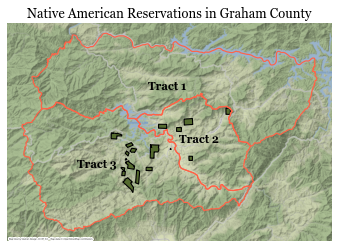

In [5]:
hfont = {"fontname": "Georgia"}

ax = tracts.boundary.plot(color="tomato", linewidth=1.2)
tracts["coords"] = tracts["geometry"].apply(
    lambda x: x.representative_point().coords[:]
)
tracts["coords"] = [coords[0] for coords in tracts["coords"]]
gdf.plot(
    ax=ax,
    color="darkolivegreen",
    edgecolor="black",
    linewidth=1.1,
)
cx.add_basemap(ax, attribution_size = 2)
ax.set_axis_off()
ax.set_title(
    "Native American Reservations in Graham County",
    **hfont,
    size=13,
)
labels = ["Tract 1", "Tract 2", "Tract 3"]
i = 0
for idx, row in tracts.iterrows():
    plt.annotate(
        text=labels[i],
        xy=(row["coords"][0] - 1500, row["coords"][1]),
        horizontalalignment="center",
        **hfont,
        **{"fontweight": "bold"},
        size=11,
    )
    i += 1
ax.figure.savefig(
    "graham.png",
    dpi=500,
)
